<a href="https://colab.research.google.com/github/Axis121/AMLS_Project/blob/main/Face_Shape_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://towardsdatascience.com/basic-smile-detection-using-opencv-and-dlib-aeb22afb9e67


In [ ]:
import cv2
import dlib
from google.colab.patches import cv2_imshow
#https://stackoverflow.com/questions/3426108/how-to-sort-a-list-of-strings-numerically
from natsort import natsorted # pip install natsort
import os
from os import listdir
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
def faceLandmarks(im):

    # Path for the detection model, you can download it from here: https://github.com/italojs/facial-landmarks-recognition/blob/master/shape_predictor_68_face_landmarks.dat
    PREDICTOR_PATH = r"/content/drive/MyDrive/Colab Notebooks/Test_folder/shape_predictor_68_face_landmarks.dat"
    
    # Create object to detect the face
    faceDetector = dlib.get_frontal_face_detector()

    # Create object to detect the facial landmarks
    landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

    # Detect faces
    faceRects = faceDetector(im, 0)

    # Initialize landmarksAll array
    landmarksAll = []

    # For each face detected in the image, this chunk of code creates a ROI around the face and pass it as an argument to the 
    # facial landmark detector and append the result to the array landmarks 
    for i in range(0, len(faceRects)):
        newRect = dlib.rectangle(int(faceRects[i].left()),
                            int(faceRects[i].top()),
                            int(faceRects[i].right()),
                            int(faceRects[i].bottom()))
        landmarks = landmarkDetector(im, newRect)
        landmarksAll.append(landmarks)

    return landmarksAll, faceRects


In [ ]:
def renderFacialLandmarks(im, landmarks):
    
    # Convert landmarks into iteratable array
    points = []
    [points.append((p.x, p.y)) for p in landmarks.parts()]

    # Loop through array and draw a circle for each landmark
    for p in points:
        cv2.circle(im, (int(p[0]),int(p[1])), 2, (255,0,0),-1)

    # Return image with facial landmarks 
    return im

Extractions of features

In [ ]:
def extractFeatures(folder_dir): 
    number_of_features = 136 #68 coordinates, x and y points
    features = np.ones((1,number_of_features))*10
    current_features = np.zeros((1,number_of_features))

    for images in natsorted(os.listdir(folder_dir)):
    
        # check if the image ends with png
        if (images.endswith(".png")):
            
            print(images) # for testing
            #type(images)
            ##use images to finish the directory call for im
            ## Read an image to a variable
            im = cv2.imread(folder_dir +"/" + images)
            
            # Get landmarks using the function created above
            landmarks, _ = faceLandmarks(im)

            if len(landmarks) == 0: #set features to 0
                for j in range(68):
                  current_features [0,j]=0
                  current_features [0,j+68]=0

            else:
                # Render the landmarks on the first face detected. You can specify the face by passing the desired index to the landmarks array.
                # In this case, one face was detected, so I'm passing landmarks[0] as the argument.
                faceWithLandmarks = renderFacialLandmarks(im, landmarks[0])
                for j in range(68):
                  #print(j)
                  current_features [0,j]=landmarks[0].parts()[0].x-landmarks[0].parts()[j].x
                  current_features [0,j+68]=landmarks[0].parts()[0].y-landmarks[0].parts()[j].y
        features = np.vstack((features,current_features))
    
    features = np.delete(features,0,axis = 0)
    return features
    print("done")
            

In [ ]:
def getSmileLabel(label_dir):
  df = pd.read_csv(label_dir)
  #df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test_folder/dataset/labels_modified.csv')
  #df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/Datasets/celeba/labels_modified.csv')
  #print(df.iloc[:,3].values)


  # replace() syntax
  df = df.replace(-1,0)
  labels = df.iloc[:,2].values #face shape is the 3rd coloumn, eye colour is the 2nd
  labels = np.transpose(labels)

  return labels

In [ ]:
folder_dir = "/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/Datasets/cartoon_set/img"
#folder_dir = "/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/Datasets/cartoon_set/test"

#folder_dir = "/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/Datasets/cartoon_set/single_test"

features = extractFeatures(folder_dir)
np.savetxt("real_cartoon_features.csv",features)
np.save("/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/B1/feature_backup_2.npy",features)

Streaming output truncated to the last 5000 lines.
5000.png
5001.png
5002.png
5003.png
5004.png
5005.png
5006.png
5007.png
5008.png
5009.png
5010.png
5011.png
5012.png
5013.png
5014.png
5015.png
5016.png
5017.png
5018.png
5019.png
5020.png
5021.png
5022.png
5023.png
5024.png
5025.png
5026.png
5027.png
5028.png
5029.png
5030.png
5031.png
5032.png
5033.png
5034.png
5035.png
5036.png
5037.png
5038.png
5039.png
5040.png
5041.png
5042.png
5043.png
5044.png
5045.png
5046.png
5047.png
5048.png
5049.png
5050.png
5051.png
5052.png
5053.png
5054.png
5055.png
5056.png
5057.png
5058.png
5059.png
5060.png
5061.png
5062.png
5063.png
5064.png
5065.png
5066.png
5067.png
5068.png
5069.png
5070.png
5071.png
5072.png
5073.png
5074.png
5075.png
5076.png
5077.png
5078.png
5079.png
5080.png
5081.png
5082.png
5083.png
5084.png
5085.png
5086.png
5087.png
5088.png
5089.png
5090.png
5091.png
5092.png
5093.png
5094.png
5095.png
5096.png
5097.png
5098.png
5099.png
5100.png
5101.png
5102.png
5103.png
5104.png
5105

In [ ]:
print(np.shape(features))

(10000, 136)


In [ ]:
#np.save("/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/B1/feature_backup_2.npy",features)

In [ ]:
#test = np.load("/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/B1/feature_backup.npy")

In [ ]:
#print(np.shape(test))

(10019, 136)


In [ ]:
#print(features[50,:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
features = np.load("/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/B1/feature_backup_2.npy")

In [ ]:
np.shape(features)

(10000, 136)

Saving features locally

In [ ]:
#features = np.loadtxt("real_cartoon_features.csv")

OSError: ignored

In [ ]:
print(test[925,:10])

[   0.   -3.   -8.  -13.  -20.  -31.  -47.  -63.  -82. -101.]


In [ ]:
print(test[926,:10])

[   0.   -3.   -8.  -13.  -21.  -33.  -48.  -64.  -82. -101.]


Get Labels

In [ ]:
label_dir = '/content/drive/MyDrive/Colab Notebooks/Test_folder/Upload/Datasets/cartoon_set/labels_modified.csv'
labels = getSmileLabel(label_dir)


In [ ]:
print(labels)

[4 4 3 ... 2 2 2]


Separate features and lables into training and testing sets

In [ ]:
#size = 135
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(features[:,:17], labels, test_size=0.3,random_state=109) # 70% training and 30% test


Graph features and lables

<ipython-input-47-26f8c1865f4a>:3: RuntimeWarning: divide by zero encountered in true_divide
  feature_norm = features / features.max(axis=0)
<ipython-input-47-26f8c1865f4a>:3: RuntimeWarning: invalid value encountered in true_divide
  feature_norm = features / features.max(axis=0)


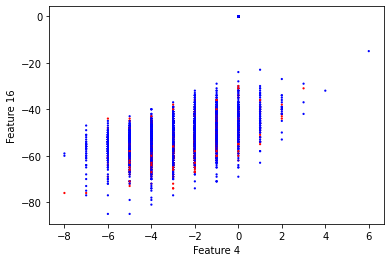

In [ ]:
col = np.where(labels>0,'b','r')

feature_norm = features / features.max(axis=0)

plt.scatter(features[:,1], features[:,6], c=col, s=5, linewidth=0)
plt.xlabel("Feature 4")
plt.ylabel("Feature 16")
plt.show()

Using different models

Logistic regression

In [ ]:
logr_model = LogisticRegression().fit(X_train, Y_train)
preds = logr_model.predict(X_test)
print(metrics.classification_report(preds, Y_test))
metrics.confusion_matrix(Y_test,preds)

              precision    recall  f1-score   support

           0       0.58      0.53      0.55       666
           1       0.43      0.29      0.34       875
           2       0.45      0.43      0.44       609
           3       0.22      0.39      0.28       333
           4       0.48      0.56      0.52       517

    accuracy                           0.43      3000
   macro avg       0.43      0.44      0.43      3000
weighted avg       0.45      0.43      0.43      3000



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[356, 162,  19,  36,  46],
       [139, 252,  93,  59,  48],
       [ 46, 133, 261,  72,  71],
       [ 64, 164, 185, 130,  60],
       [ 61, 164,  51,  36, 292]])

SVM

In [ ]:
#Import svm model
from sklearn import svm

#feaature should be normalised first
X_test_normalised = X_test / X_test.max(axis=0)
X_train_normalised = X_train / X_train.max(axis=0)

#Create a svm Classifier
clf = svm.SVC(decision_function_shape='ovr',kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_pred, Y_test))
metrics.confusion_matrix(Y_test,y_pred)

<ipython-input-50-3b9439aecaa7>:5: RuntimeWarning: divide by zero encountered in true_divide
  X_test_normalised = X_test / X_test.max(axis=0)
<ipython-input-50-3b9439aecaa7>:5: RuntimeWarning: invalid value encountered in true_divide
  X_test_normalised = X_test / X_test.max(axis=0)
<ipython-input-50-3b9439aecaa7>:6: RuntimeWarning: divide by zero encountered in true_divide
  X_train_normalised = X_train / X_train.max(axis=0)
<ipython-input-50-3b9439aecaa7>:6: RuntimeWarning: invalid value encountered in true_divide
  X_train_normalised = X_train / X_train.max(axis=0)


KeyboardInterrupt: ignored

Clustering (produces decent accuracy but this is a supervised learning problem)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_train)



In [ ]:
#print(y_km)
print(metrics.classification_report(y_km, Y_train))

Saving the chosen model

In [ ]:
import pickle

In [ ]:

# save the model to disk
filename = 'B1_logr_model.sav'
pickle.dump(logr_model, open(filename, 'wb'))

In [ ]:
 # load the model from disk
filename = 'B1_logr_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.4156666666666667
0.4156666666666667


Remove missing values

In [ ]:
features_temp = features
labels_temp = labels
featuresAndLabels = np.column_stack((features,labels))
print(np.shape(featuresAndLabels))
featuresAndLabels = featuresAndLabels[~np.all(featuresAndLabels[:,:136] == 0, axis=1)]
print(np.shape(featuresAndLabels))
clean_features = featuresAndLabels [:,:136]
clean_labels = featuresAndLabels [:,136]
print(np.shape(clean_features))
print(np.shape(clean_labels))
print(clean_labels)

(10000, 137)
(7984, 137)
(7984, 136)
(7984,)
[4. 3. 0. ... 3. 2. 2.]


Feature selection using select k best and chi test

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=30).fit_transform(abs(clean_features), clean_labels)
X_new.shape

(7984, 30)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, clean_labels, test_size=0.3,random_state=109) # 70% training and 30% test


In [ ]:
logr_model = LogisticRegression().fit(X_train, Y_train)
preds = logr_model.predict(X_test)
print(metrics.classification_report(preds, Y_test))
metrics.confusion_matrix(Y_test,preds)

              precision    recall  f1-score   support

         0.0       0.70      0.52      0.60       656
         1.0       0.26      0.45      0.33       256
         2.0       0.49      0.41      0.44       612
         3.0       0.27      0.38      0.32       368
         4.0       0.54      0.48      0.51       504

    accuracy                           0.45      2396
   macro avg       0.45      0.45      0.44      2396
weighted avg       0.50      0.45      0.47      2396



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[340,  29,  46,  24,  44],
       [127, 116,  77,  70,  62],
       [ 50,  26, 249, 103,  80],
       [ 61,  53, 177, 138,  74],
       [ 78,  32,  63,  33, 244]])

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, Y_train)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.244 total time=   6.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.224 total time=   4.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.220 total time=   4.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.233 total time=   4.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.232 total time=   4.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.244 total time=   5.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.224 total time=   7.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.220 total time=   8.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.233 total time=   8.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.232 total time=   5.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.270 total time=   5.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)


In [ ]:
grid_predictions = grid.predict(X_test)

# print classification report
print(metrics.classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.69      0.55      0.61       619
           1       0.39      0.67      0.49       591
           2       0.65      0.62      0.63       583
           3       0.64      0.50      0.56       603
           4       0.72      0.55      0.62       604

    accuracy                           0.57      3000
   macro avg       0.62      0.58      0.58      3000
weighted avg       0.62      0.57      0.58      3000



In [ ]:
from sklearn import svm
#feaature should be normalised first
X_test_normalised = X_test / X_test.max(axis=0)
X_train_normalised = X_train / X_train.max(axis=0)

#Create a svm Classifier
clf = svm.SVC(decision_function_shape='ovo',kernel='rbf',C=100, gamma=0.0001) #

#Train the model using the training sets
clf.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_pred, Y_test))
metrics.confusion_matrix(Y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69       515
         1.0       0.56      0.64      0.60       398
         2.0       0.69      0.65      0.67       542
         3.0       0.58      0.63      0.60       462
         4.0       0.70      0.66      0.68       479

    accuracy                           0.65      2396
   macro avg       0.65      0.65      0.65      2396
weighted avg       0.65      0.65      0.65      2396



array([[344,  44,  27,  21,  47],
       [ 69, 255,  29,  50,  49],
       [ 24,  25, 352,  80,  27],
       [ 29,  44,  97, 291,  42],
       [ 49,  30,  37,  20, 314]])

https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

learning curves +++ add them

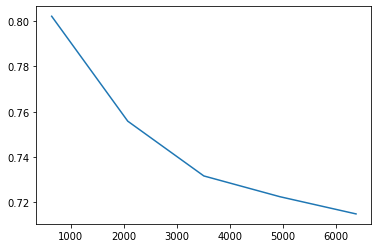

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np

estimator = svm.SVC(decision_function_shape='ovo',kernel='rbf',C=100, gamma=0.0001)
#train_sizes = [1, 100, 500, 2000, 5000, 7654]

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_new, clean_labels, cv = 5, return_times=True)



<function matplotlib.pyplot.show(*args, **kw)>

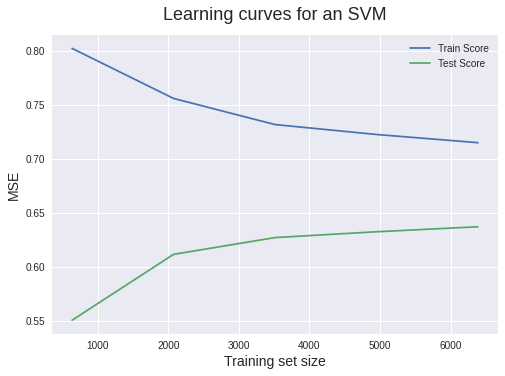

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for an SVM', fontsize = 18, y = 1.03)
plt.legend(["Train Score", "Test Score"])
plt.show

In [ ]:
print(train_sizes)

[ 638 2075 3512 4949 6387]


In [ ]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = )

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

NameError: ignored